In [472]:
import numpy as np
import pandas as pd
import cvxpy as cp
from geopy import distance
import time
from python_tsp.exact import solve_tsp_dynamic_programming


In [473]:
data = pd.read_csv('../Dataset/fri26_d.txt',delim_whitespace=True,header=None).to_numpy()

In [474]:
np.random.seed(42)
import random

n = 30  # number of points to generate
points = []

for i in range(n):
    lat = round(random.uniform(-90, 90), 6)
    lon = round(random.uniform(-180, 180), 6)
    points.append((lat, lon))

print(points)


################################################
# Building distance matrix
################################################
n = len(points)
C = np.zeros((n,n))

for i in range(0, n):
    for j in range(0, len(points)):
        C[i,j] = distance.distance(points[i], points[j]).km

# Showing distance matrix
print('Distance Matrix is:\n')
print(np.round(C,4))

[(1.04486, 47.707216), (11.323225, -80.655874), (-80.233095, 159.11344), (-48.39717, 15.862199), (12.862497, -110.665889), (15.885327, 4.912852), (-24.091749, 110.163583), (16.551079, 81.251206), (-5.308621, 124.232248), (-53.795587, 148.375768), (-40.726046, 99.074696), (67.420597, -161.330736), (-42.893965, 119.807696), (-11.736787, 82.038533), (-34.407674, -173.186088), (12.602837, -107.109539), (37.916738, 136.298704), (-32.007492, 93.768435), (14.807814, -40.403433), (2.384408, -165.304723), (67.657404, 76.566047), (-4.251336, -66.740702), (48.788506, -123.709161), (-35.531309, -36.709802), (82.23838, -54.193869), (-52.298353, 150.479222), (87.952617, 142.624098), (-86.67421, 108.157284), (69.462087, 1.456879), (-64.369364, 128.314207)]
Distance Matrix is:

[[    0.     14161.7077 10512.9029  6280.5546 17186.2028  4974.2381
   7286.3755  4057.3694  8536.2722 10801.7381  6947.2979 12079.1446
   8640.4159  4051.1959 14392.83   16864.1178  9817.7433  6071.4474
   9784.8662 16343.5497

In [475]:
# Generate a random SDP.
n = C.shape[0]
np.random.seed(1)
# C = data
e = np.ones((n,1))
I = np.eye(n)
J = np.ones((n,n))
constant =  2-2*np.cos((2*np.pi)/n)
# Define and solve the CVXPY problem.
# Create a symmetric matrix variable.
X = cp.Variable((n,n), symmetric=True)
# The operator >> denotes matrix inequality.
constraints = [
    X[i][i] == 0 for i in range(n)
]
constraints += [
    X@e == 2*e
]
constraints += [
    X[i][j] >= 0 for i in range(n) for j in range(n)
]
constraints += [
    X[i][j] <= 1 for i in range(n) for j in range(n)
]
constraints += [
    2*I-X+J-(constant*I) >> 0
]
prob = cp.Problem(cp.Minimize(1/2*cp.trace(C @ X)),
                  constraints)
start_time = time.time()
prob.solve(verbose=False)
print("--- %s seconds ---" % (time.time() - start_time))
# Print result.
print("The optimal value is", prob.value)
# print("A solution X is")
# print(X.value)


--- 2.610957145690918 seconds ---
The optimal value is 90748.8537144886


In [476]:
# start_time = time.time()
# permutation, distance2 = solve_tsp_dynamic_programming(C)
# print("--- %s seconds ---" % (time.time() - start_time))

In [477]:
# permutation

In [478]:
################################################
# Solving the integer programming problem
################################################
# Define the decision variables
x = cp.Variable((n, n), boolean=True)

# Define the objective function
obj = cp.Minimize(cp.sum(cp.multiply(C, x)))

# Define the constraints
constraints = []
for i in range(n):
    constraints.append(cp.sum(x[i, :]) == 1)  # each city is visited exactly once
for j in range(n):
    constraints.append(cp.sum(x[:, j]) == 1)  # each city is left exactly once
for i in range(n):
    for j in range(n):
        constraints.append(x[i, j] + x[j, i] <= 1)  # prevent subtours

# Define the problem and solve it
prob = cp.Problem(obj, constraints)
start_time = time.time()
prob.solve()
print("--- %s seconds ---" % (time.time() - start_time))
# Print the optimal tour and its length
tour = [0]
i = 0
while len(tour) < n:
    j = np.argmax(x.value[i, :])
    tour.append(j)
    i = j
tour.append(0)
print('Optimal tour:', tour)
print('Length:', round(obj.value))

--- 0.5064568519592285 seconds ---
Optimal tour: [0, 5, 18, 21, 23, 3, 27, 2, 29, 9, 25, 14, 19, 22, 11, 26, 24, 28, 20, 16, 8, 6, 12, 10, 17, 13, 7, 0, 5, 18, 0]
Length: 91128


In [479]:
def thirdMax(nums):
    nums.sort(reverse = True)
    count = 1
    previous = nums[0]

    for i in range(len(nums)):
        if nums[i] != previous:
            count = count + 1
            previous = nums[i]
        if count == 2:
            return nums[i]
    return nums[0]

In [480]:
def thirdMax(nums):
    nums.sort(reverse = True)
    count = 1
    previous = nums[0]

    for i in range(len(nums)):
        if nums[i] != previous:
            count = count + 1
            previous = nums[i]
        if count == 3:
            return nums[i]
    return nums[0]

In [481]:
Res = X.value
out = [[1 if X.value[i][j]>thirdMax(X.value[i].tolist()) else 0 for i in range(X.shape[0])]for j in range(X.shape[1])]

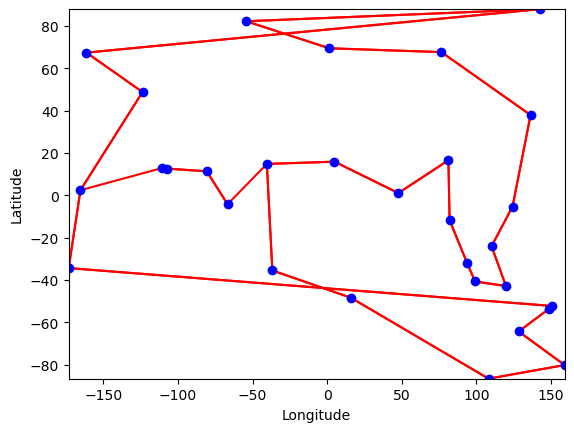

In [482]:
import numpy as np
import matplotlib.pyplot as plt

# Define the latitude and longitude of the points
lat = [i[0] for i in points]
lon = [i[1] for i in points]

# Define the adjacency matrix
adj_matrix = np.array(out)

# Plot the points and the edges
plt.scatter(lon, lat, color='b', zorder=2)
for i in range(adj_matrix.shape[0]):
    for j in range(adj_matrix.shape[1]):
        if adj_matrix[i,j] == 1:
            plt.plot([lon[i], lon[j]], [lat[i], lat[j]], color='r', zorder=1)

# Set the axis limits and labels
plt.xlim(min(lon)-0.02, max(lon)+0.02)
plt.ylim(min(lat)-0.02, max(lat)+0.02)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


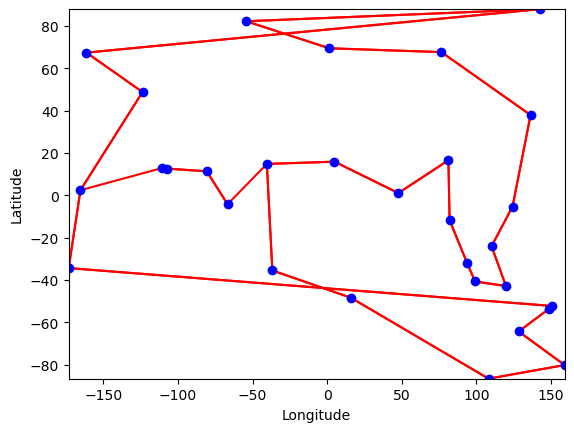

In [483]:
import numpy as np
import matplotlib.pyplot as plt

# Define the latitude and longitude of the points
lat = [i[0] for i in points]
lon = [i[1] for i in points]

# Define the adjacency matrix
adj_matrix = np.array(out)

# Plot the points and the edges
plt.scatter(lon, lat, color='b', zorder=2)
for i in range(adj_matrix.shape[0]):
    for j in range(adj_matrix.shape[1]):
        if adj_matrix[i,j] == 1:
            plt.plot([lon[i], lon[j]], [lat[i], lat[j]], color='r', zorder=1)

# Set the axis limits and labels
plt.xlim(min(lon)-0.02, max(lon)+0.02)
plt.ylim(min(lat)-0.02, max(lat)+0.02)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
